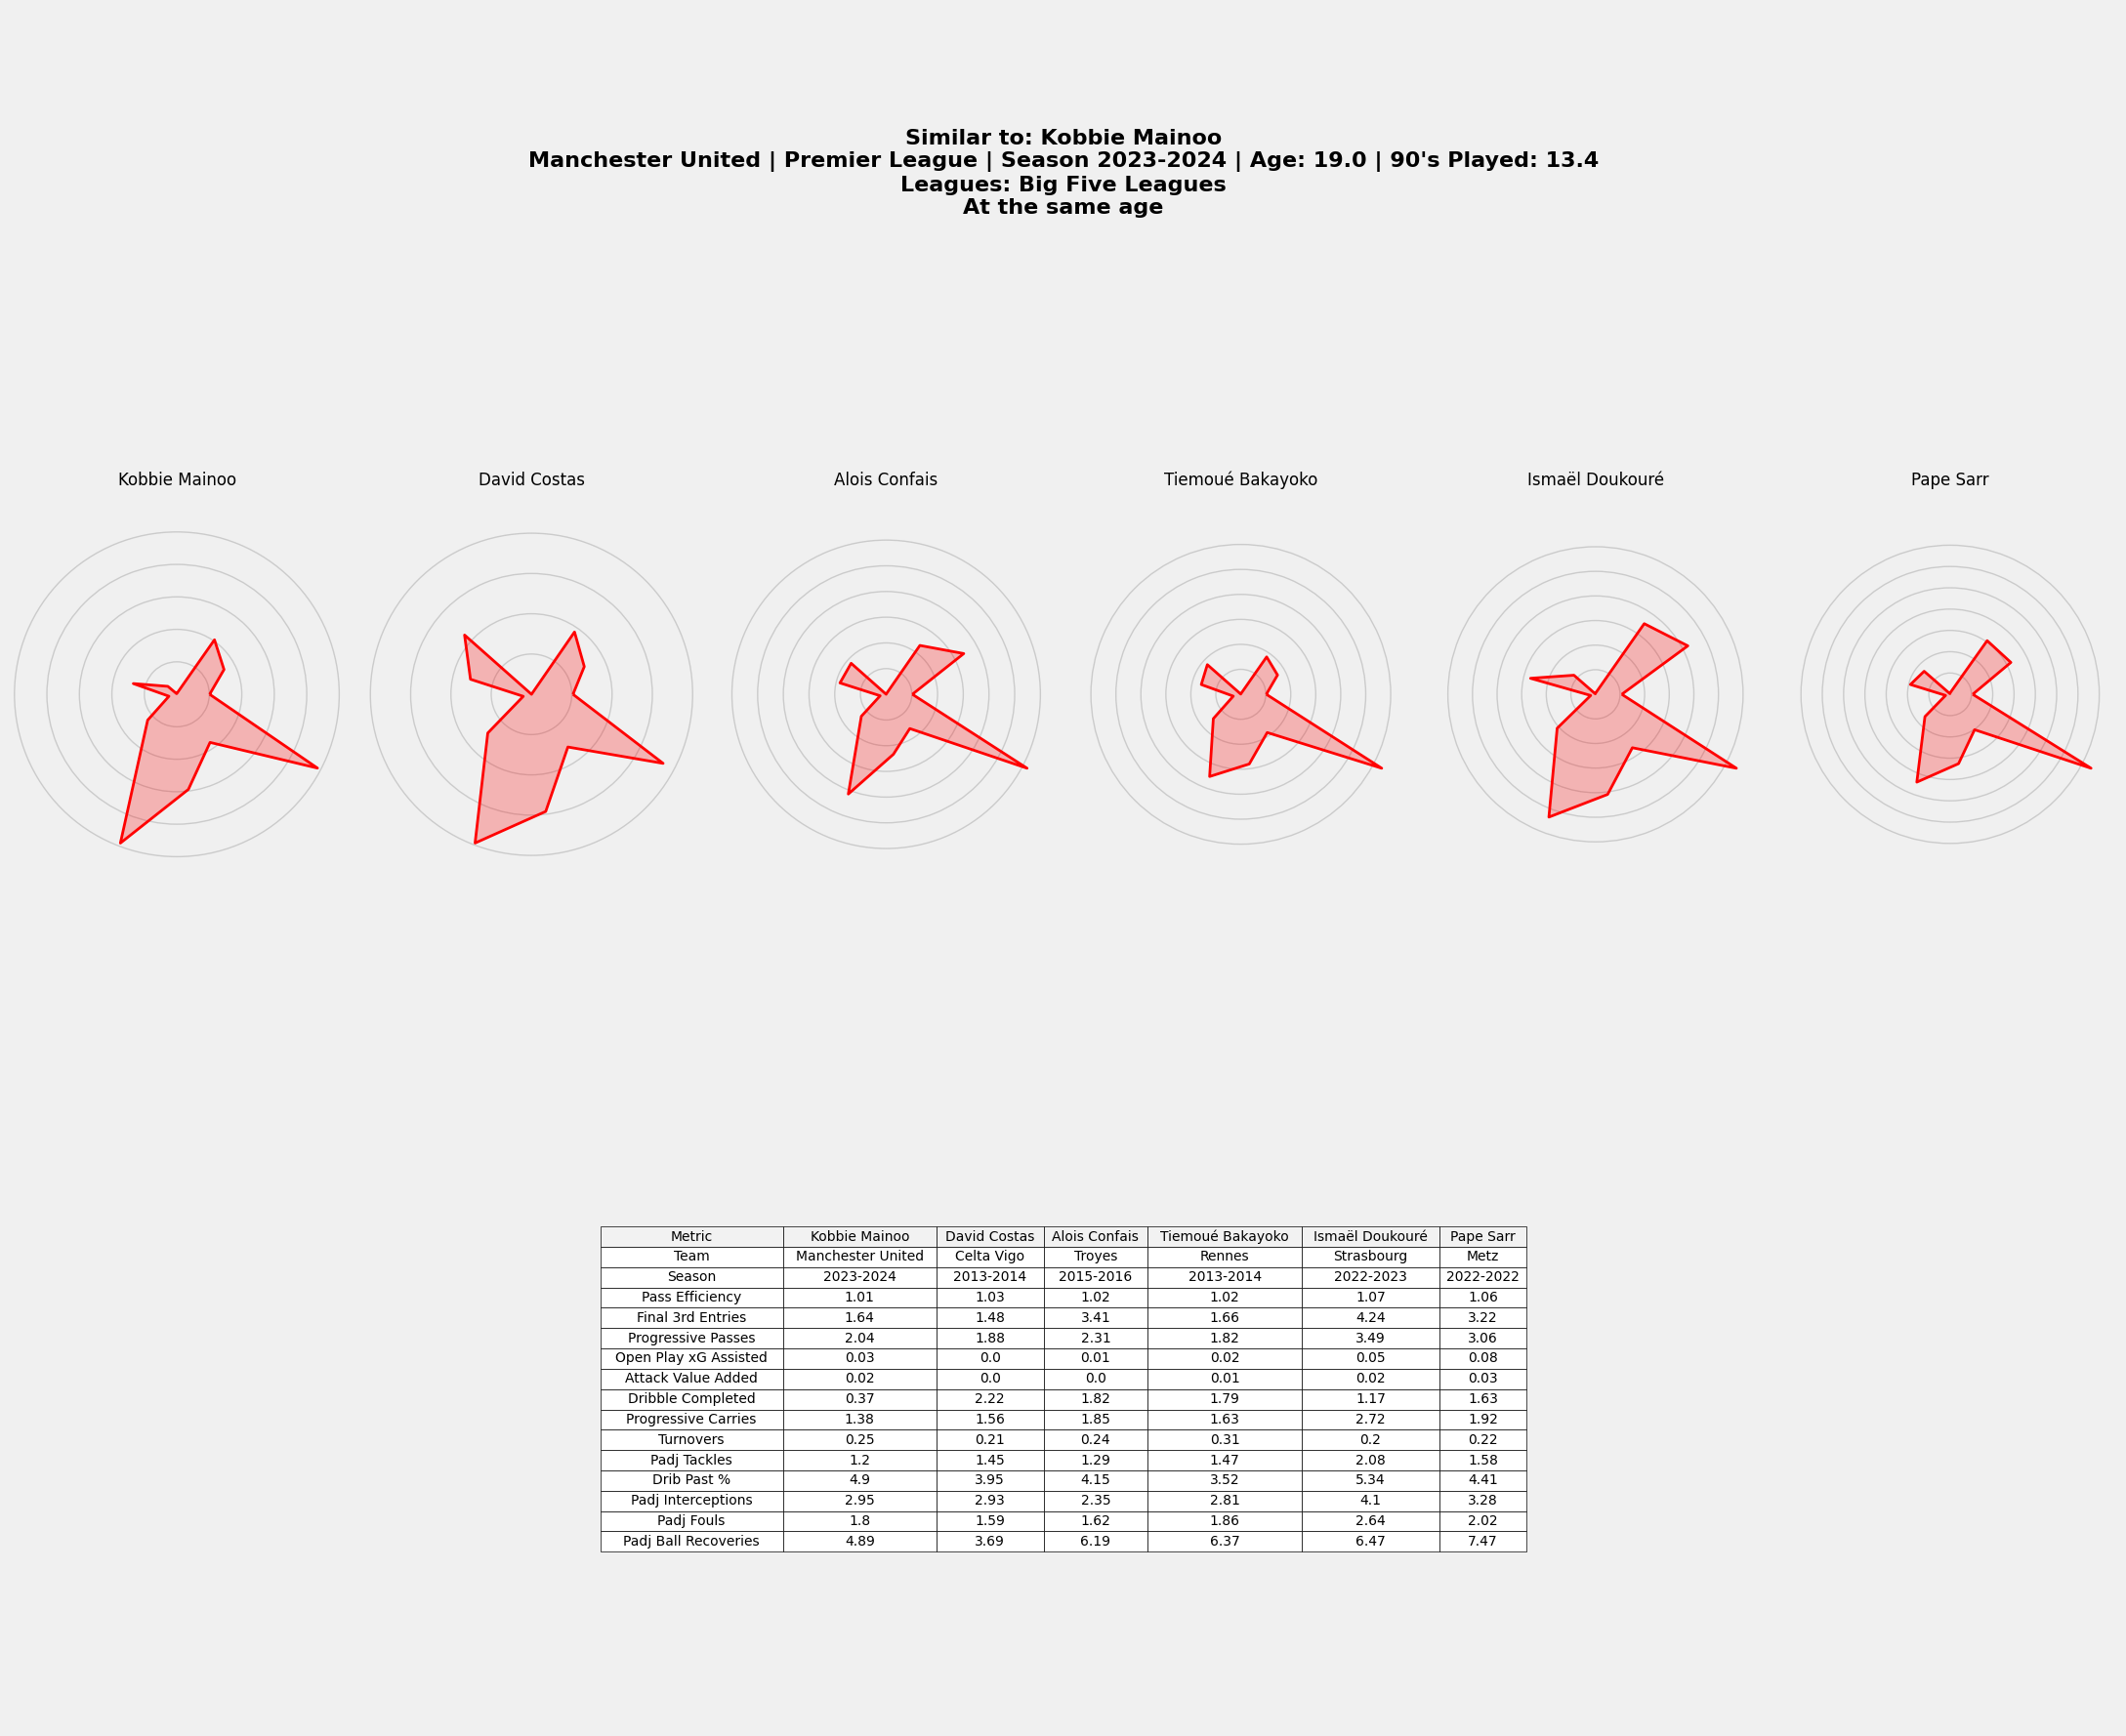

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import radar_chart, Radar, FontManager, grid
from highlight_text import fig_text

# Define the data with the updated structure
data = {
    'Metric': ['Team', 'Season', 'Pass Efficiency', 'Final 3rd Entries', 'Progressive Passes', 'Open Play xG Assisted', 
               'Attack Value Added', 'Dribble Completed', 'Progressive Carries', 'Turnovers', 'Padj Tackles', 'Drib Past %', 
               'Padj Interceptions', 'Padj Fouls', 'Padj Ball Recoveries'],
    'Kobbie Mainoo': ['Manchester United', '2023-2024', 1.01, 1.64, 2.04, 0.03, 0.02, 0.37, 1.38, 0.25, 1.2, 4.9, 2.95, 1.8, 4.89],
    'David Costas': ['Celta Vigo', '2013-2014', 1.03, 1.48, 1.88, 0.0, 0.0, 2.22, 1.56, 0.21, 1.45, 3.95, 2.93, 1.59, 3.69],
    'Alois Confais': ['Troyes', '2015-2016', 1.02, 3.41, 2.31, 0.01, 0.0, 1.82, 1.85, 0.24, 1.29, 4.15, 2.35, 1.62, 6.19],
    'Tiemoué Bakayoko': ['Rennes', '2013-2014', 1.02, 1.66, 1.82, 0.02, 0.01, 1.79, 1.63, 0.31, 1.47, 3.52, 2.81, 1.86, 6.37],
    'Ismaël Doukouré': ['Strasbourg', '2022-2023', 1.07, 4.24, 3.49, 0.05, 0.02, 1.17, 2.72, 0.2, 2.08, 5.34, 4.1, 2.64, 6.47],
    'Pape Sarr': ['Metz', '2022-2022', 1.06, 3.22, 3.06, 0.08, 0.03, 1.63, 1.92, 0.22, 1.58, 4.41, 3.28, 2.02, 7.47]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to plot radar charts
def plot_radar(ax, data):
    num_vars = len(data)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    data += data[:1]
    angles += angles[:1]

    ax.fill(angles, data, color='red', alpha=0.25)
    ax.plot(angles, data, color='red', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks([])

# Apply the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Define the number of charts
num_charts = len(df.columns) - 1  # subtracting the 'Metric' column

# Create subplots
fig = plt.figure(figsize=(22, 18), tight_layout=True)
gs = fig.add_gridspec(5, num_charts)

# Add title
ax_title = fig.add_subplot(gs[0, :])
ax_title.text(0.5, 0.5, 'Similar to: Kobbie Mainoo\nManchester United | Premier League | Season 2023-2024 | Age: 19.0 | 90\'s Played: 13.4\nLeagues: Big Five Leagues\nAt the same age', 
              horizontalalignment='center', verticalalignment='center', fontsize=16, fontweight='bold')
ax_title.axis('off')

# Plot radar charts for each player
for i in range(1, len(df.columns)):
    radar_ax = fig.add_subplot(gs[1:3, i-1], polar=True)
    player_data = df.iloc[2:, i].values.tolist()  # Only numeric data for radar
    plot_radar(radar_ax, player_data)
    radar_ax.set_title(df.columns[i], size=12, y=1.1)

# Add the table beneath the radar charts
ax_table = fig.add_subplot(gs[3:, :])
ax_table.axis('off')
table = ax_table.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=['#f2f2f2']*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

plt.subplots_adjust(top=0.85, bottom=0.15, hspace=0.2)
plt.show()


In [12]:
import matplotlib as mpl
mpl.get_configdir()


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\RaymondCarpenter\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib.libs'